### Marcus van Bergen (10871993) Steven Raaijmakers (1080424)

# Lab 5

### A.1
The convolution of F and W1 results in:
$$
\left(\begin{array}{cc} 
1 & 3 & 4 & 6 & 6 & 8 & 6 & 6 & 6 & 13 & 18 & 23 & 24 & 26 & 25 & 24 & 15 & 8
\end{array}\right)
$$

### A.2
The convolution of F and W2 results in:
$$
\left(\begin{array}{cc} 
1 & 2 & 0 & 1 & 1 & 0 & -1 & -1 & 2 & 6 & 4 & 0 & 2 & 1 & -2 & -1 & -7 & -8
\end{array}\right)
$$

### B.1
The sobel filter can be seperated into two kernels:

$$
\left(\begin{array}{cc} 
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 
\end{array}\right)
=
\left(\begin{array}{cc} 
1 \\
2 \\
1
\end{array}\right)
\left(\begin{array}{cc} 
1 & 0 & -1 
\end{array}\right)
$$

### B.2

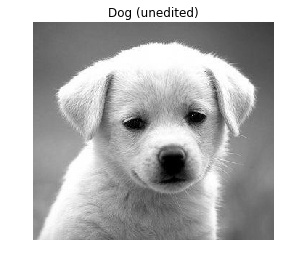

In [5]:
from scipy.ndimage.filters import uniform_filter, convolve
from scipy import ndimage
from time import time
import matplotlib.pyplot as plt
import numpy as np

dog = ndimage.imread("images/dog.jpg", mode="L", flatten=True)
plt.title("Dog (unedited)")
plt.axis('off')
plt.imshow(dog, cmap="gray")
plt.show()

We compared the execution time of two similar functions: convolve and uniform_filter. 

For each S (range 1 to 10), we repeated the experiment 5 times to get the average execution time of the function for different S.

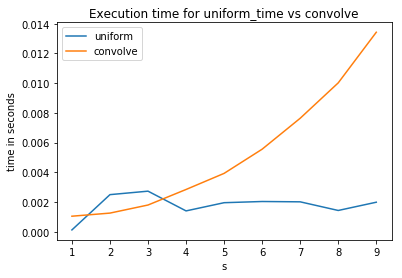

In [6]:
interval_s = np.arange(1, 10, 1)
repetition = 5

u_ys = []
# uniform
for s in interval_s:
    startTime = time()
    for i in range(0, repetition):
        uniform_filter(dog, s)
    elapsedTimeInSeconds = time()-startTime
    u_ys.append(elapsedTimeInSeconds / repetition)
    
c_ys = []
# convolve
for s in interval_s:
    startTime = time()
    for i in range(0, repetition):
        convolve(dog, np.ones((s,s))/(s**2))
    elapsedTimeInSeconds = time()-startTime
    c_ys.append(elapsedTimeInSeconds / repetition)

plt.title("Execution time for uniform_time vs convolve")
plt.plot(interval_s, u_ys, label="uniform")
plt.plot(interval_s, c_ys, label="convolve")
plt.legend()
plt.xlabel("s")
plt.ylabel("time in seconds")
plt.show()

Using the convolve function, you have to multiply your NxM matrix by a AxB matrix (NxMxAxB), in contrast to the uniform filter where you have yo multiply your NxM matrix by a Ax1 matrix and a 1xB (NxMx(A+B)), which has a more advantageous complexity.

### C.1

## Filters

### Sobel:
#### The Sobel operator or commonly known as the Sobel filter consists of two operations. The first operation is convolving and image $A$ with two kernels. These two kernels are for each direction, $G_x$ being for the horizontal derivative approximation and $G_y$ being for the vertical approximation. 

### Prewitt:
#### The Prewitt method is similar to the Sobol filter in the sense that at first one convolves your image with a kernel in the x-direction and in the y-direction. Instead of the convolution matrix of the sobol filter the Prewitt filter uses different matrices.

### Gauss:
#### A Gaussian filter is made by calculating the Gauss function in two dimensions and creating a convolution matrix with this. Then you can apply this matrix with the image to create a blurred version of the image. 

### Laplace:
#### The Laplace operator $f$ is the sum of the second derivatives of $f$: $$\Delta f = \frac{\partial^2f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$ Practically this means applying the Laplace operator is simply nothing else than convolving an image with the following convolution matrix:

$ 
\begin{bmatrix} 
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$

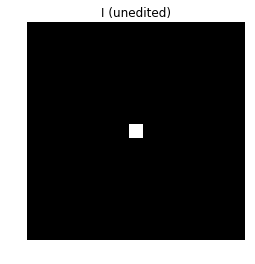

In [7]:
from scipy.ndimage.filters import laplace, sobel, prewitt, gaussian_laplace

I = np.zeros((15, 15))
I[7][7] = 1

plt.title("I (unedited)")
plt.axis('off')
plt.imshow(I, cmap="gray")
plt.show()

With the next code we apply some filters to image I (displayed above).

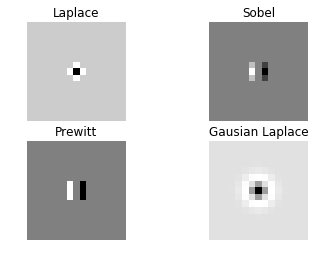

In [8]:
plt.subplot(2,2,1)
plt.imshow(laplace(I), cmap="gray")
plt.axis('off')
plt.title("Laplace")

plt.subplot(2,2,2)
plt.imshow(sobel(I), cmap="gray")
plt.axis('off')
plt.title("Sobel")

plt.subplot(2,2,3)
plt.imshow(prewitt(I), cmap="gray")
plt.axis('off')
plt.title("Prewitt")

plt.subplot(2,2,4)
plt.imshow(gaussian_laplace(I, 1), cmap="gray")
plt.axis('off')
plt.title("Gausian Laplace")

plt.show()

 - Laplace: Takes the sum of the second derivatives and calculates the sum of differences over the nearest neighbours of the central pixel.
 - Sobel: !!!!!!!

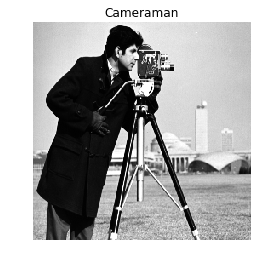

In [9]:
cameraman = ndimage.imread("images/cameraman.png", mode="L", flatten=True)

plt.axis('off')
plt.title("Cameraman")
plt.imshow(cameraman, cmap="gray")
plt.show()

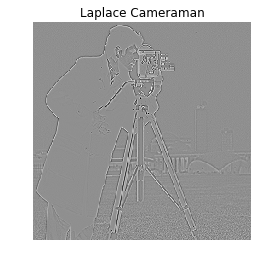

In [10]:
plt.axis('off')
plt.title("Laplace Cameraman")
plt.imshow(laplace(cameraman), cmap="gray")
plt.show()

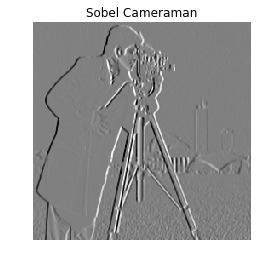

In [11]:
plt.axis('off')
plt.title("Sobel Cameraman")
plt.imshow(sobel(cameraman), cmap="gray")
plt.show()

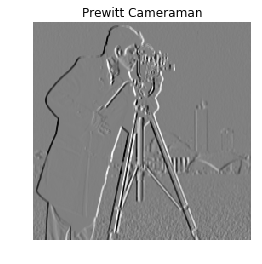

In [12]:
plt.axis('off')
plt.title("Prewitt Cameraman")
plt.imshow(prewitt(cameraman), cmap="gray")
plt.show()

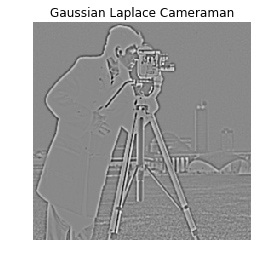

In [13]:
plt.axis('off')
plt.title("Gaussian Laplace Cameraman")
plt.imshow(gaussian_laplace(cameraman, 1), cmap="gray")
plt.show()

### C.2

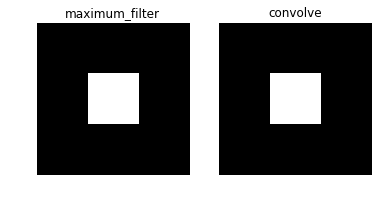

In [14]:
from scipy.ndimage.filters import maximum_filter

plt.subplot(1,2,1)
plt.title("maximum_filter")
plt.axis('off')
plt.imshow(maximum_filter(I,(5,5)), cmap="gray")

plt.subplot(1,2,2)
plt.title("convolve")
plt.axis('off')
plt.imshow(convolve(I, np.ones((5,5))), cmap="gray")

plt.show()

The maximum filter takes the maximum value of the neighbourhood. The convolve function takes the sum of the neighboorhood.

The result of these filter however look the same on our image I. This is due to the fact that black is represented as 0, and white as 255. Since there is only one white pixel, the white pixel will result in 255 for every neighbourhood it takes place in via the maximum_filter. The result of the convolve of any neighbourhood the white pixel is in will also be 255, because (0*X)+255=255.


# Lab 6

## 6.1, 6.2 , 6.3

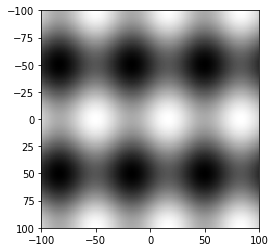

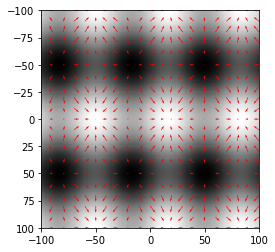

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(-100,101); y = np.arange(-100,101);
X, Y = np.meshgrid(x,y)
A = 1; B = 2; V = 6*np.pi/201; W = 4*np.pi/201;
F = A*np.sin(V*X) + B*np.cos(W*Y)
plt.clf();
plt.imshow(F, cmap=plt.cm.gray, extent=(-100,100,100,-100));
plt.show()

#derivatives with respect to x or y; depending on the function
Fx = A * V * np.cos(V * X) 
Fy = -1 *(B) * W * np.sin(W * Y)

xx = np.arange(-100, 101, 10);
yy = np.arange(-100, 101, 10);
XX, YY = np.meshgrid(xx, yy);

FFx = Fx[::10, ::10]
FFy = Fy[::10, ::10]
plt.clf();
plt.imshow(F, cmap=plt.cm.gray, extent=(-100,100,100,-100), origin='upper');
plt.quiver( xx, yy, FFx, FFy, color='red', angles='xy' );
plt.show()

# 6.4 & 6.5
# 1D and 2D plots on time and iterations. 
## 2D Gauss on time and iterations: 

scale: 3.0


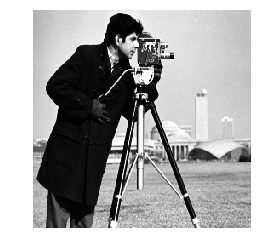

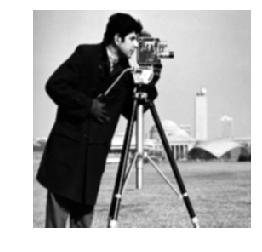

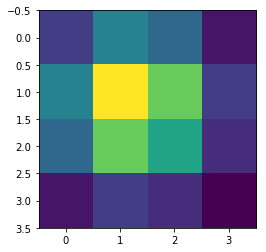

0.81 seconds
scale: 7.0


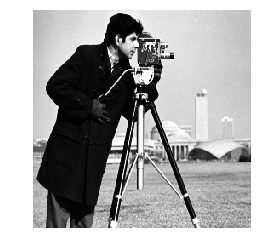

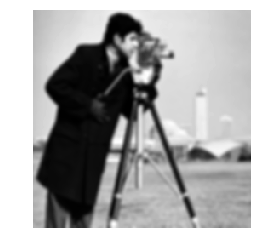

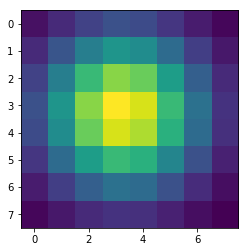

0.83 seconds
scale: 11.0


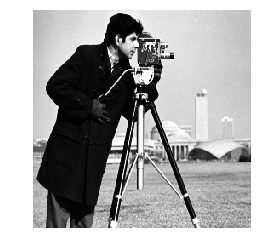

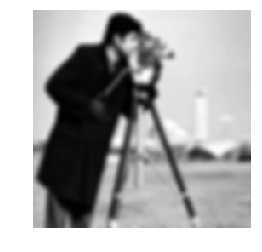

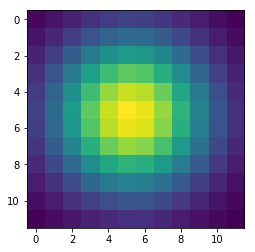

1.00 seconds
scale: 15.0


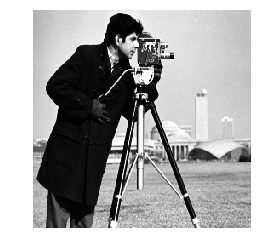

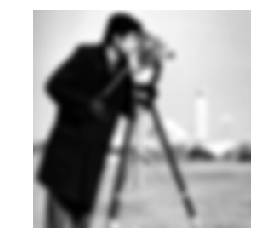

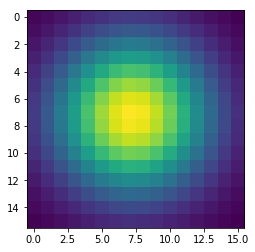

0.79 seconds
scale: 19.0


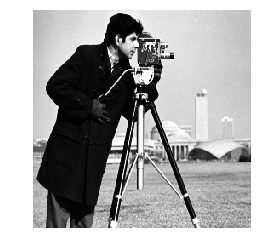

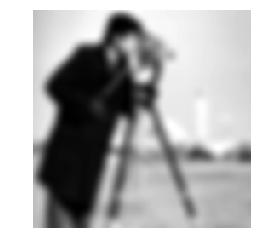

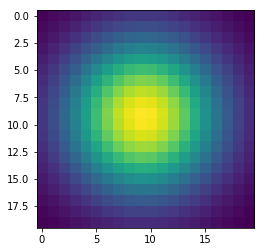

0.71 seconds
scale: 23.0


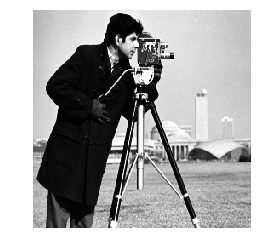

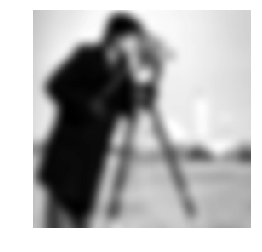

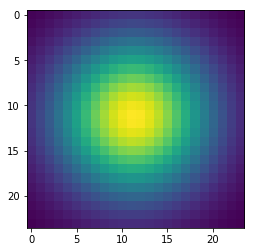

0.87 seconds
scale: 27.0


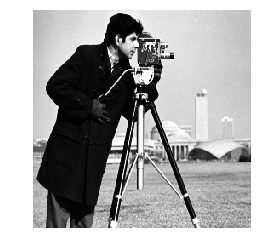

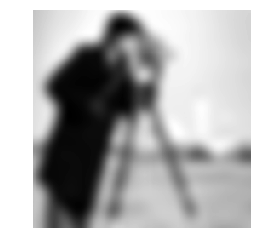

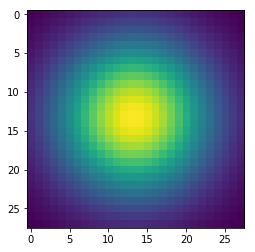

0.89 seconds
scale: 31.0


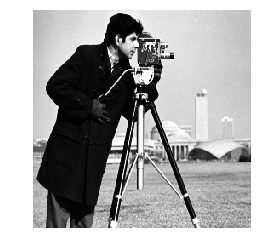

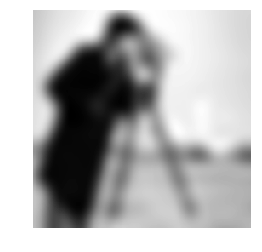

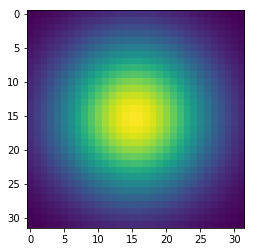

0.74 seconds
scale: 35.0


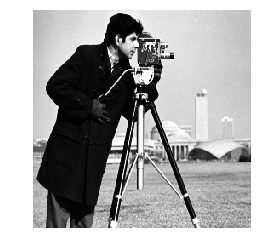

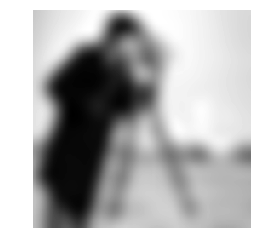

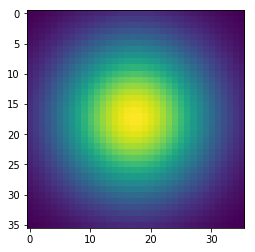

0.99 seconds
scale: 39.0


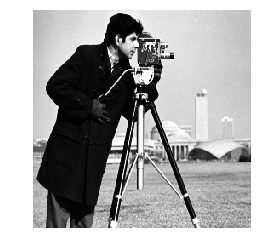

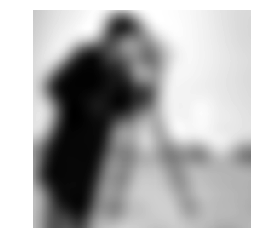

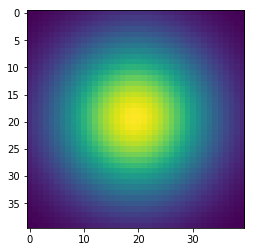

0.84 seconds
scale: 43.0


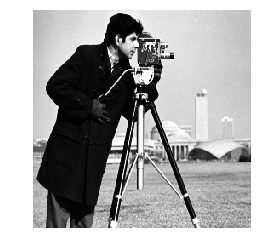

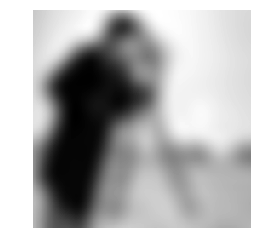

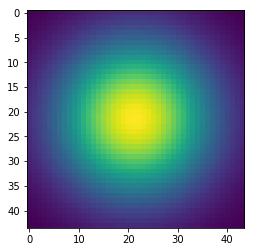

1.06 seconds
scale: 47.0


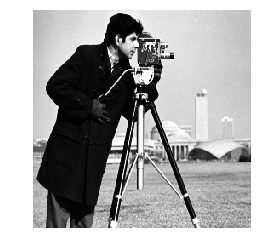

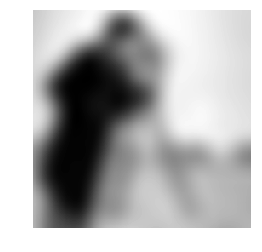

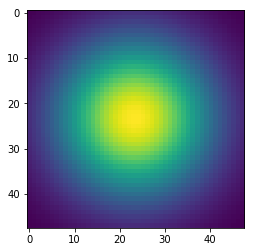

1.28 seconds
scale: 51.0


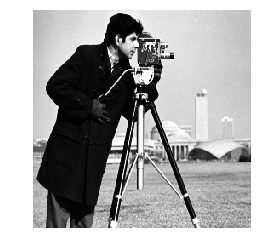

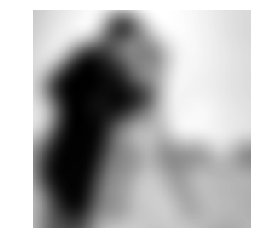

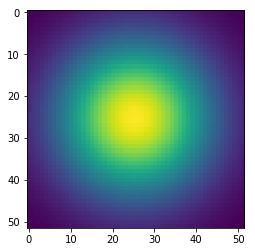

1.53 seconds
scale: 55.0


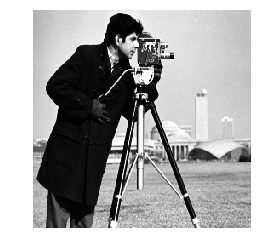

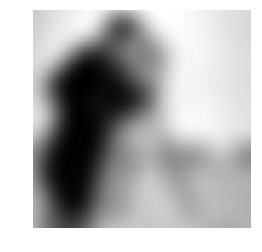

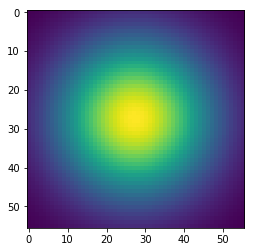

1.60 seconds
scale: 59.0


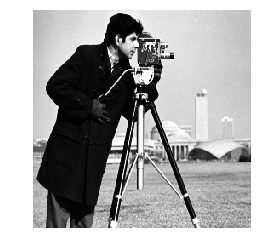

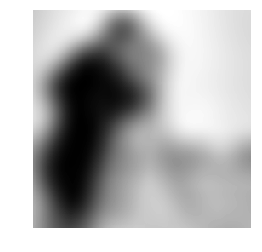

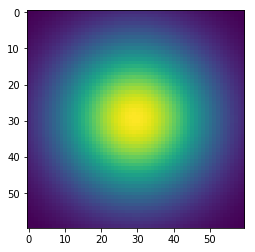

0.99 seconds
scale: 63.0


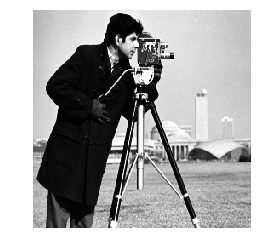

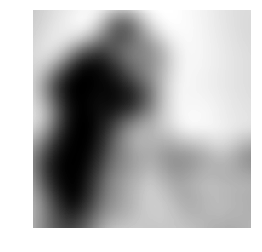

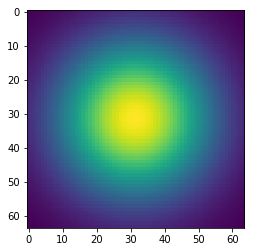

1.40 seconds
scale: 67.0


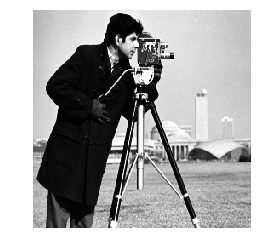

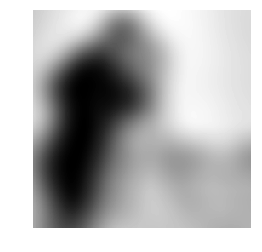

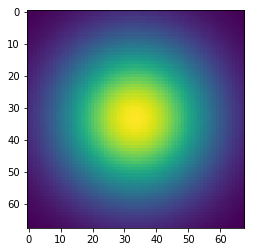

1.88 seconds
scale: 71.0


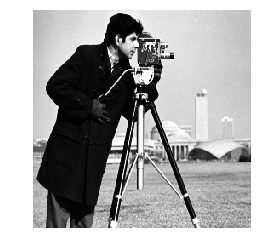

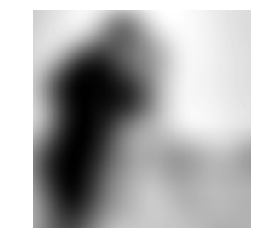

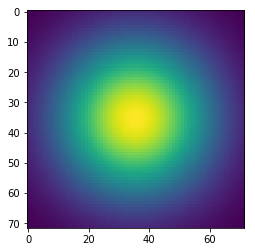

2.09 seconds
scale: 75.0


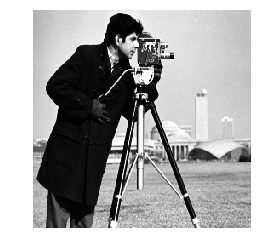

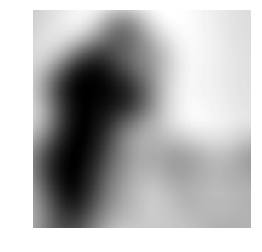

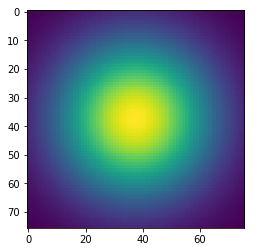

2.26 seconds


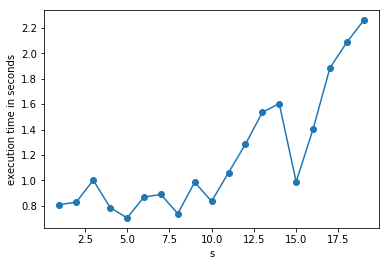

In [132]:
import time
from scipy import ndimage
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

global scale

# 2d gauss function
# https://en.wikipedia.org/wiki/Gaussian_blur
def gauss_2d(x, y, s):
    sigma_sq = s*s
    return (1/ (2 * np.pi *sigma_sq))* (np.e**(-((x**2 + y**2)/(2 * sigma_sq))))

# Gauss convolution calculated here
def Gauss(s):
    
    # kernel scaling of factor 2 and 3/4'ths
    x = np.arange(-2*s+0.75, 2*s+0.75)
    y = np.arange(-2*s+0.75, 2*s+0.75)
    
    print "scale: " + str(math.fabs(x[0]) + math.fabs(x[-1]))
    
    x, y = np.meshgrid(y, x)
    return (gauss_2d(x, y, s))

data_t = []
data_i = []
iterr = 1

# Here you can define how many many iterations
for s in range(1, 20):
    t0 = time.time()
    
    fig = plt.figure()
    kernel = Gauss(s)
    #normal image
    img = ndimage.imread('./images/cameraman.png')

    #convoled image
    img_convol = convolve(img, kernel, mode='nearest')


    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()
    plt.axis('off')
    plt.imshow(img_convol, cmap="gray")
    plt.show()

    plt.imshow(kernel, interpolation='nearest')
    plt.show()
    
    t1 = time.time()
    total = (t1-t0) % 60
    
    data_t.append(total)
    data_i.append(iterr)
    
    iterr = iterr + 1
    
    #print str(scale) + " scale"
    print str("%.2f" % total) + " seconds"


plt.plot(data_i, data_t, '-o')
plt.xlabel("s")
plt.ylabel("execution time in seconds")
plt.legend()
plt.show()




### 6.5.1

The gaussian function can be seperated by dimension:

$G^s(x,y) = G^s_1(x)G^s_1(y)$

The Gauss1(s) is the kernel for the x-dimension, and can be written as:

$G^s(x) = \frac{1}{\sqrt{2 \pi} \cdot s} e^{-\frac{x^2}{2s^2}}$

Thus Gauss1(s) returns the one dimensional convolution for scale s.

In [17]:
def Gauss1(s):
    x = np.arange(-s, s + 1)
    t = (1 / (np.sqrt(2 * np.pi) * s) * np.exp(-(x**2) / (2 * s**2)))
    return t

# 6.5.2
## 1D Gauss on Time

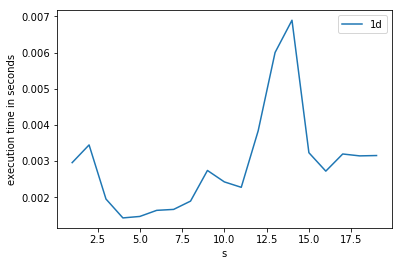

In [97]:
import time
from scipy.ndimage.filters import convolve1d

cameraman = ndimage.imread("images/cameraman.png", mode="L", flatten=True)

def Gauss1(s):
    x = np.arange(-s, s + 1)
    t = (1 / (np.sqrt(2 * np.pi) * s) * np.exp(-(x**2) / (2 * s**2)))
    return t

def gc2d(F, s):
    ca1d = convolve1d(F, Gauss1(s), axis=-1, mode='nearest')
    return convolve1d(ca1d, Gauss1(s), axis=0, mode='nearest')

ss = np.arange(1, 20, 1)
s_ys = []
s_ys2 = []

repetition = 20

# 1d
for s in ss:
    startTime = time.time()    
    for i in range(0, repetition):        
        gc2d(cameraman, s) 
    elapsedTimeInSeconds = time.time()-startTime
    s_ys.append(elapsedTimeInSeconds / repetition)


plt.plot(ss, s_ys, label="1d")
plt.xlabel("s")
plt.ylabel("execution time in seconds")
plt.legend()
plt.show()

### 6.6.1

All derivatives of 2d gaus:

two vars:

 - $G(x, y) = \frac{1}{2\pi s^2} e^{-\frac{x^2 + y^2}{2s^2}}$

 - $G^s_x(x, y) = -\frac{x}{2\pi s^4} e^{-\frac{x^2 + y^2}{2s^2}}$

 - $G^s_y(x, y) = -\frac{y}{2\pi s^4} e^{-\frac{x^2 + y^2}{2s^2}}$
 
 - $G^s_{xx}(x, y) = -\frac{x^2 - s^2}{2\pi s^6} e^{-\frac{x^2 + y^2}{2s^2}}$
 
 - $G^s_{xy}(x, y) = -\frac{xy}{2\pi s^6} e^{-\frac{x^2 + y^2}{2s^2}}$
 
one var:

 - $G^s_{x}(x) = -\frac{x}{\sqrt{2\pi}s^3} e^{-\frac{x^2}{2s^2}}$
 
 - $G^s_{y}(x) = -\frac{y}{\sqrt{2\pi}s^3} e^{-\frac{x^2}{2s^2}}$
 
 - $G^s_{xx}(x) = \frac{x^2 - s^2}{\sqrt{2\pi}s^5} e^{-\frac{x^2}{s^2}}$
 
 - $G^s_{yy}(x) = \frac{y^2 - s^2}{\sqrt{2\pi}s^5} e^{-\frac{x^2}{s^2}}$
 
All these derivatives are seperable. We can proof this by multipling the 1d gaussians together:

$G^s(x,y) = G^s(x)G^S(y)$

$ = \frac{1}{s\sqrt{2\pi}} e^{-\frac{x^2}{2s^2}} \cdot \frac{1}{s\sqrt{2\pi}} e^{-\frac{y^2}{2s^2}}$

$ = \frac{1}{2\pi s^2} e^{-\frac{x^2 + y^2}{2s^2}}$

This results to the same function as $G(x, y)$.

Since gD should be able to do differentation up to 2 degrees, we derived analytically the first order and the second order of f(x):

$f(x) = \frac{1}{\sqrt{2 \pi} \cdot s} e^{-\frac{x^2}{2s^2}}$

The first part is a constant (so it remains the same). The second part keeps getting derived.

$f'(x) = \frac{1}{\sqrt{2 \pi} \cdot s} \cdot -\frac{e^-{\frac{x^2}{2s^2}}x}{s^2}$

$f''(x) = \frac{1}{\sqrt{2 \pi} \cdot s} \cdot -\frac{-x^2+s^2}{e^{\frac{x^2}{2s^2}}s^4}$

In [20]:
def gD(F, s, iorder, jorder):
    ns = s * 3.0
    x = np.arange(-ns, ns+1)

    f = (1 / (np.sqrt(2 * np.pi) * s)) * np.exp(-(x**2 / (2 * s**2)))
    ff = (1 / (np.sqrt(2 * np.pi) * s)) * -( np.exp(-(x**2) / (2*s**2)) * x) / (s**2)
    fff = (1 / (np.sqrt(2 * np.pi) * s)) * -(-x**2 + s**2) / (np.exp((x**2) / (2*s**2)) * s**4)
    fs = [f, ff, fff]

    for i, t in enumerate([iorder, jorder]):
        F = convolve1d(F, fs[t], axis=i, mode='nearest')
    return F

### 6.6.3

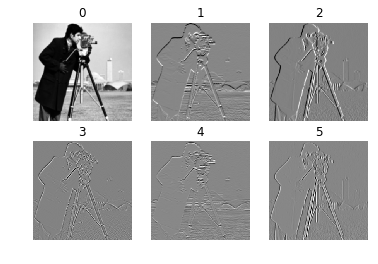

In [27]:
s = 1

f_0 = gD(cameraman, s, 0, 0)
fx_1 = gD(cameraman, s, 1, 0)
fy_1 = gD(cameraman, s, 0, 1)
fxx = gD(cameraman, s, 1, 1)
fxy_2 = gD(cameraman, s, 2, 0)
fyy_2 = gD(cameraman, s, 0, 2)

cs = [f_0, fx_1, fy_1, fxx, fxy_2, fyy_2]

for i, c in enumerate(cs):
    plt.subplot(str(23) + str(i + 1))
    plt.title(i)
    plt.imshow(c, cmap="gray")
    plt.axis('off')

plt.show()

### 6.7.1

For Fx and Fy: A, B, V and W are given. We then create a meshgrid and need to compute the derivatives manually:

$f(x) = Asin(Vx) \rightarrow f'(x) = A \cdot V \cdot sin(Vx)$

$f(y) = Bcos(Wx) \rightarrow f'(y) = B \cdot w \cdot -sin(Wy)$

In [22]:
xx = np.arange(-128, 128)
yy = np.arange(-128, 128)
# switched?
XX, YY = np.meshgrid(xx, yy)

# constante
A = 1; B = 2; V = 6*np.pi/201; W = 4*np.pi/201

# afgeleide
Fx = A * V * np.cos(V * XX)
Fy = B * W * -np.sin(W * YY)

# descrete aproach
dFx = gD(cameraman, 1, 1, 0)
dFy = gD(cameraman, 1, 0, 1)

The division of Fx by dFx should result in a homogeneous image (one color), since:

$c = \frac{Fx}{dFx}$

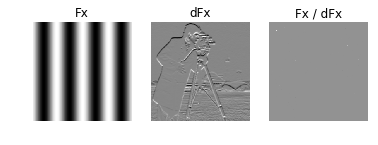

In [23]:
# X
plt.subplot(2,3,1)
plt.title("Fx")
plt.imshow(Fx, cmap="gray")
plt.axis('off')

plt.subplot(2,3,2)
plt.title("dFx")
plt.imshow(dFx, cmap="gray")
plt.axis('off')

plt.subplot(2,3,3)
plt.title("Fx / dFx")
plt.imshow(Fx/dFx, cmap="gray")
plt.axis('off')

plt.show()

The Y part handles the vertical derivatives. Once again the result should be a homogenous image:

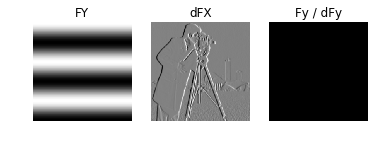

In [24]:
# Y
plt.subplot(2,3,4)
plt.title("FY")
plt.imshow(Fy, cmap="gray")
plt.axis('off')

plt.subplot(2,3,5)
plt.title("dFX")
plt.imshow(dFy, cmap="gray")
plt.axis('off')

plt.subplot(2,3,6)
plt.title("Fy / dFy")
plt.imshow(Fy / dFy, cmap="gray")
plt.axis('off')

plt.show()